In [2]:
# installing packages 
!pip install pandas
!pip install numpy
!pip install torch 
!pip install fair-esm
!pip install networkx
!pip install matplotlib

import numpy as np 
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt



  Using cached fair_esm-2.0.0-py3-none-any.whl.metadata (37 kB)
Using cached fair_esm-2.0.0-py3-none-any.whl (93 kB)
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: '/scg/apps/software/jupyter/python_3.9/lib/python3.9/site-packages/esm'
Consider using the `--user` option or check the permissions.



In [3]:
!pip install Biopython

In [4]:
# download the physical links E.coli 
!wget https://stringdb-static.org/download/protein.physical.links.full.v12.0/511145.protein.physical.links.full.v12.0.txt.gz

# unzip file 
!gunzip 511145.protein.physical.links.full.v12.0.txt.gz



--2025-05-05 17:23:29--  https://stringdb-static.org/download/protein.physical.links.full.v12.0/511145.protein.physical.links.full.v12.0.txt.gz
Resolving stringdb-static.org (stringdb-static.org)... 49.12.123.75
Connecting to stringdb-static.org (stringdb-static.org)|49.12.123.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 470987 (460K) [application/octet-stream]
Saving to: ‘511145.protein.physical.links.full.v12.0.txt.gz.5’

100%[======================================>] 470,987      796KB/s   in 0.6s   

2025-05-05 17:23:30 (796 KB/s) - ‘511145.protein.physical.links.full.v12.0.txt.gz.5’ saved [470987/470987]

gzip: 511145.protein.physical.links.full.v12.0.txt already exists; do you wish to overwrite (y or n)? ^C


In [5]:
# Load the physical interactions file as interaction_file
interaction_file = "511145.protein.physical.links.full.v12.0.txt"
df = pd.read_csv(interaction_file, sep=" ")
print(df.shape)

print("First few rows of the data:")
print(df.head())

# # Step 2: (Optional) Filter for strong physical interactions
# # Physical scores still range from 0 to 1000
# df_high_conf = df[df["combined_score"] >= 700]

# print(f"Number of high-confidence physical interactions: {len(df_high_conf)}")


(85316, 10)
First few rows of the data:
       protein1      protein2  homology  experiments  experiments_transferred  \
0  511145.b0002  511145.b3091         0            0                      154   
1  511145.b0002  511145.b4207         0            0                      284   
2  511145.b0002  511145.b3258         0            0                        0   
3  511145.b0002  511145.b2530         0            0                      196   
4  511145.b0002  511145.b1945         0            0                      294   

   database  database_transferred  textmining  textmining_transferred  \
0         0                     0           0                       0   
1         0                     0           0                       0   
2         0                     0         254                       0   
3         0                     0           0                       0   
4         0                     0           0                       0   

   combined_score  
0             

Number of proteins (nodes): 3043
Number of physical interactions (edges): 42658


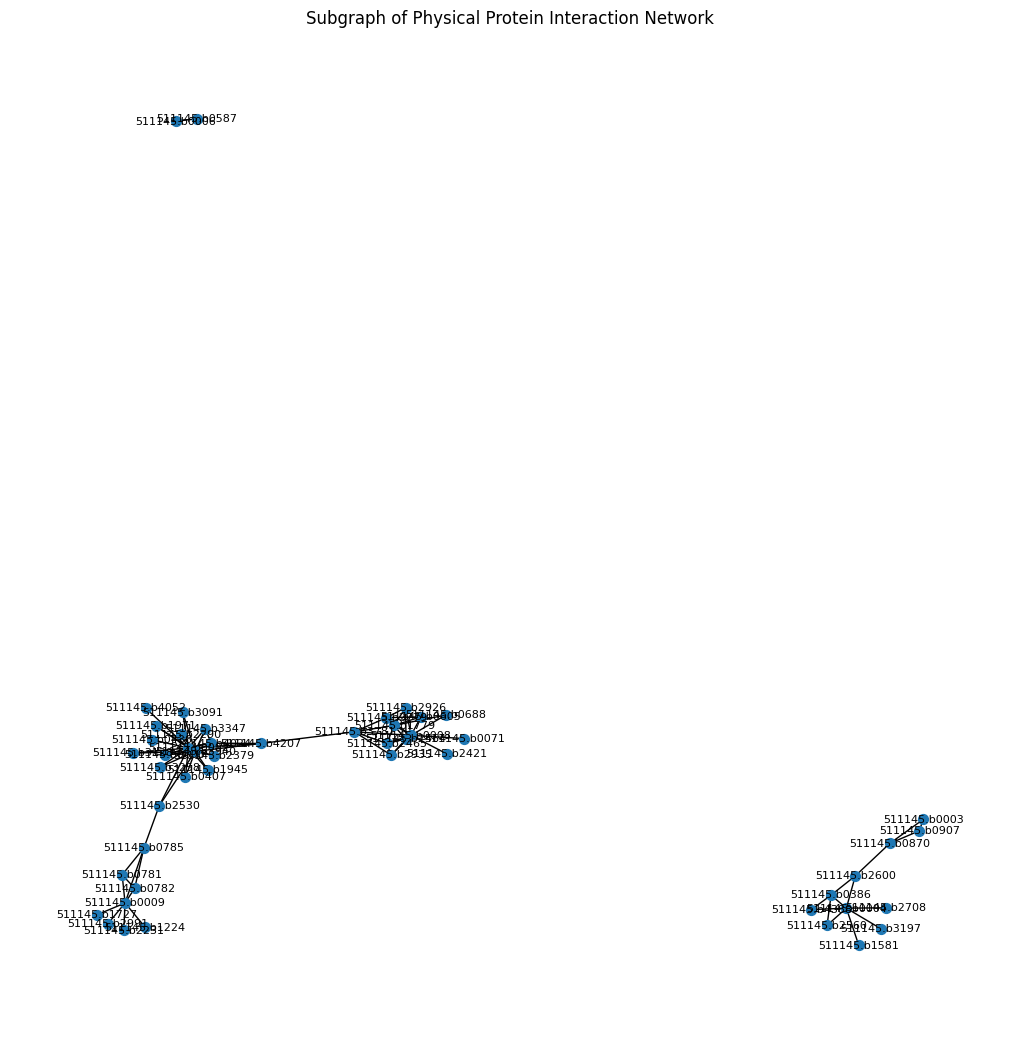

In [6]:
# Build network 

# Step 3: Build the graph
G = nx.Graph()

for idx, row in df.iterrows():
    G.add_edge(row["protein1"], row["protein2"], weight=row["combined_score"])

print(f"Number of proteins (nodes): {G.number_of_nodes()}")
print(f"Number of physical interactions (edges): {G.number_of_edges()}")

# Step 4: Visualize a small part of the network
sub_nodes = list(G.nodes())[:50]  # Take a small subset
subG = G.subgraph(sub_nodes)

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(subG, seed=42)
nx.draw(subG, pos, with_labels=True, node_size=50, font_size=8)
plt.title("Subgraph of Physical Protein Interaction Network")
plt.show()

In [ ]:
# Repeating network building with all interactions, not just physical 

# Access file: 
!wget https://stringdb-static.org/download/protein.links.v12.0/511145.protein.links.v12.0.txt.gz

# unzip file 
!gunzip 511145.protein.links.v12.0.txt.gz

In [ ]:
!ls


In [7]:
# create and visualize dataframe 

base_interaction_file = "511145.protein.links.v12.0.txt"
base_df = pd.read_csv(base_interaction_file, sep=" ")
print(base_df.shape)

print("First few rows of the data:")
print(base_df.head())


(984760, 3)
First few rows of the data:
       protein1      protein2  combined_score
0  511145.b0001  511145.b1715             520
1  511145.b0001  511145.b3783             208
2  511145.b0001  511145.b2310             275
3  511145.b0001  511145.b0005             335
4  511145.b0001  511145.b0195             158


In [ ]:
# Create network 
# Step 3: Build the graph
base_G = nx.Graph()

for idx, row in base_df.iterrows():
    base_G.add_edge(row["protein1"], row["protein2"], weight=row["combined_score"])

print(f"Number of proteins (nodes): {base_G.number_of_nodes()}")
print(f"Number of physical interactions (edges): {G.number_of_edges()}")

# Step 4: Visualize a small part of the network
sub_nodes = list(base_G.nodes())[:50]  # Take a small subset
subG = base_G.subgraph(sub_nodes)

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(subG, seed=42)
nx.draw(subG, pos, with_labels=True, node_size=50, font_size=8)
plt.title("Subgraph of Physical Protein Interaction Network")
plt.show()

In [ ]:
# Attaching sequences to network 

# download E.coli sequences 
!wget https://stringdb-downloads.org/download/protein.sequences.v12.0/511145.protein.sequences.v12.0.fa.gz

# unzip file 
!gunzip -n 511145.protein.sequences.v12.0.fa.gz


In [ ]:
from Bio import SeqIO

sequences = "511145.protein.sequences.v12.0.fa"
seq_dict = {}
for record in SeqIO.parse(sequences, "fasta"): 
    seq_dict[record.id] = str(record.seq)

In [ ]:
# getting protein IDs from the graph 
protein_ids = list(base_G.nodes)

In [ ]:
with open("ppi_graph_sequences.fasta", "w") as f:
    for pid in protein_ids:
        seq = seq_dict.get(pid)
        if seq:
            f.write(f">{pid}\n{seq}\n")
        else:
            print(f"Sequence not found for: {pid}")


In [ ]:
for pid in base_G.nodes:
    if pid in seq_dict:
        base_G.nodes[pid]["sequence"] = seq_dict[pid]


In [ ]:
print(base_G.nodes["511145.b0002"]["sequence"])
      

In [ ]:
print(seq_dict)

In [ ]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

In [ ]:
# writing to fasta file 

records = []
for pid, seq in seq_dict.items():
    records.append(SeqRecord(Seq(seq), id=pid, description=""))
    
SeqIO.write(records, "ecoli_ppi_proteins.fa", "fasta")



In [ ]:
import os
os.getcwd()

In [ ]:
!ls

In [ ]:
from IPython.display import FileLink 
FileLink("ecoli_ppi_proteins.fa")

In [ ]:
print(base_df.head())